In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [200]:
#Load the dataset
df = pd.read_csv('/Users/peggy/Downloads/House_Data/kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [201]:
#Check missing data
df.isnull().any().any()

False

In [202]:
#Check data type of each variable
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [203]:
#Convert "date" column to datetime format

df.date = pd.to_datetime(df.date)

print(df.date.dtype)

datetime64[ns]


### Distribution of House Prices in King County

- Look into the distribution of house prices using Seaborn and Empirical Cumulative Distribution Function (ECDF).
- The distribution of house prices are deviated from normal distribution and are skewed to the right.

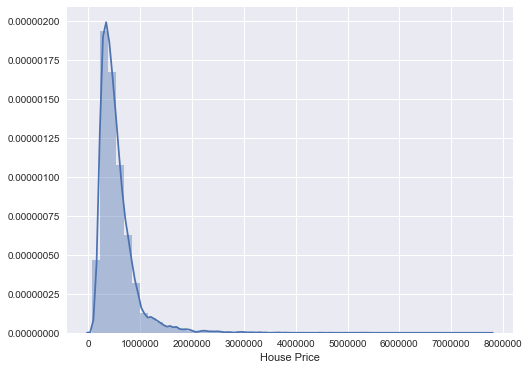

In [204]:
#Distribution plot
import seaborn as sns

fig = plt.figure(figsize = (8,6))
ax = sns.distplot(historical_price.price)
ax.set(xlabel = 'House Price')
plt.show()


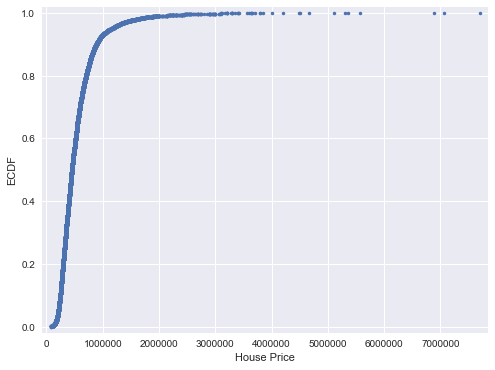

(array([   75000.,    78000.,    80000., ...,  6885000.,  7062500.,
         7700000.]),
 array([  4.62684495e-05,   9.25368991e-05,   1.38805349e-04, ...,
          9.99907463e-01,   9.99953732e-01,   1.00000000e+00]))

In [205]:
#ECDF 

historical_price = df[['price']]

def ecdf(data):
    n = len(data)
    x = np.sort(data.iloc[:,0])
    y = np.arange(1, n+1) / n
    _ = plt.figure(figsize = (8,6))
    _ = plt.plot(x, y, marker = '.', linestyle = 'none')
    _ = plt.xlabel('House Price')
    _ = plt.ylabel('ECDF')
    plt.margins(0.02)
    plt.show()
    return x, y

ecdf(historical_price)


### Outliers
- From ECDF plot, we can see that there are 3 houses with prices over $6M, we keep that 3 houses in high_prices dataframe for further discussion.


In [206]:
#Keep outliers in high_prices dataframe
high_prices = df.loc[df['price'] > 6000000]
high_prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [207]:
#Remove house with prices over $6M
#df['price'] = df.loc[df['price'] < 6000000]


### Map of House Locations & Prices
- Create a map of city neighborhoods using Python Basemap. 
- Each marker presents location and house price, and the bar at the right is price range.

/Users/peggy/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


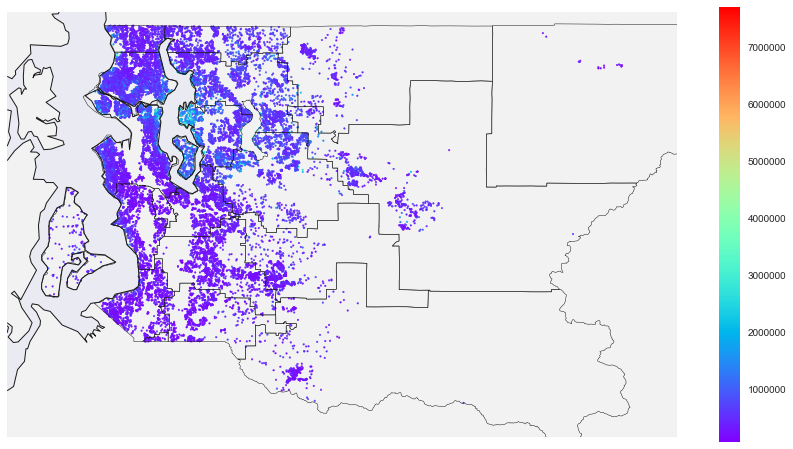

In [225]:
from mpl_toolkits.basemap import Basemap
#%matplotlib inline
#import matplotlib.pyplot as plt
#import mpld3

#mpld3.enable_notebook()

fig2 = plt.figure(figsize = (15,8))
m = Basemap(projection = 'mill',
            llcrnrlat = 47.1, llcrnrlon = -122.6, 
            urcrnrlat = 47.8, urcrnrlon = -121.2, resolution = 'h')

m.drawcoastlines()
m.drawcountries(linewidth = 2)
m.drawstates(color = 'b')
m.fillcontinents(color = '#f2f2f2', lake_color = 'aqua', zorder = 1)
m.readshapefile('/Users/peggy/Downloads/School_Districts_in_King_County__schdst_area/School_Districts_in_King_County__schdst_area', 'zipcode', drawbounds = True)
                 
ax = fig2.add_subplot(111)
x, y = m(np.array(df['long']), np.array(df['lat']))
scatter1 = ax.scatter(x, y, s = 3, 
                      c = np.array(df['price']),
                      marker = 'o', zorder = 1.5, 
                      cmap = plt.cm.rainbow)
plt.colorbar(scatter1)
plt.show()


### Correlation Heatmap 
Use heatmap to see the correlation between each attribute.

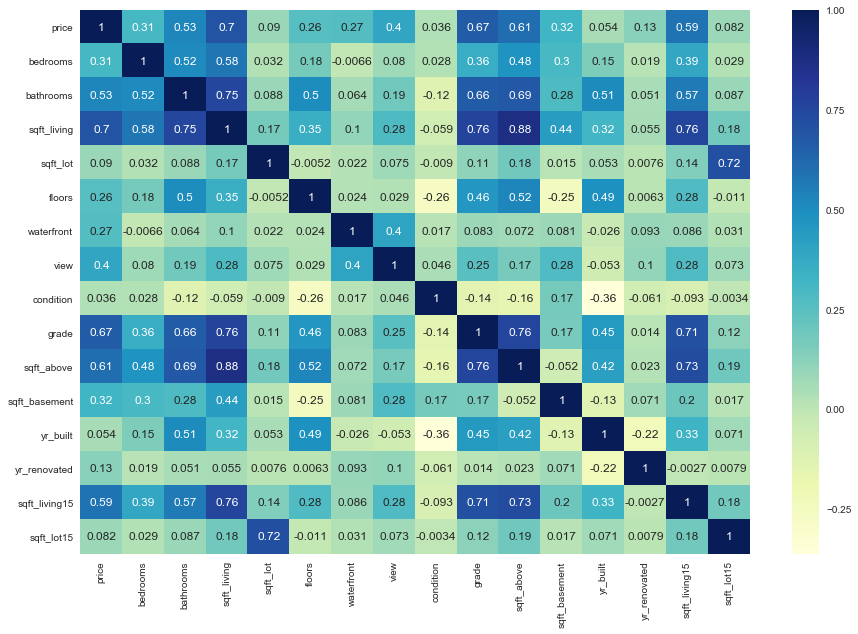

In [210]:
#Correlation

corrmat = df.drop(['id', 'date', 'zipcode', 'long', 'lat'], axis = 1).corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat, cmap="YlGnBu", annot = True)
plt.show()


The correlation heatmap tells us house price has high correlation with **'bathrooms', 'sqft_living', 'grade', 'sqft_above'** and **'sqft_living15'** respectively. **'sqft_living'** has the highest correlation with price among other variables.


### Important Features

#### sqft_living and sqft_above & price
- Visualize the relationship between sqft_living and house price in regression scatter plot
- The plot shows that houses with bigger sqft_living and sqft_above have higher house prices


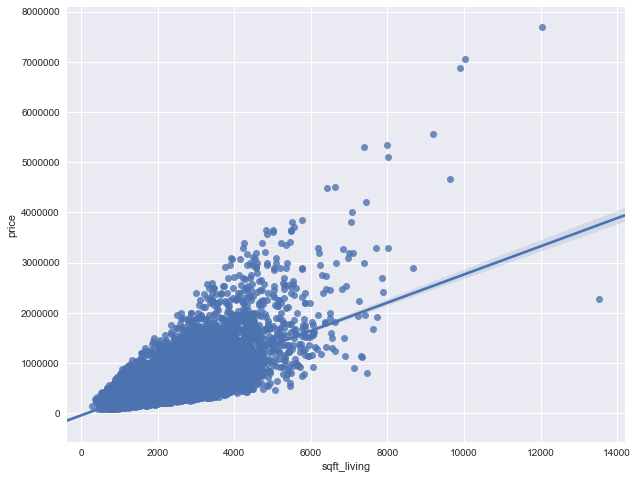

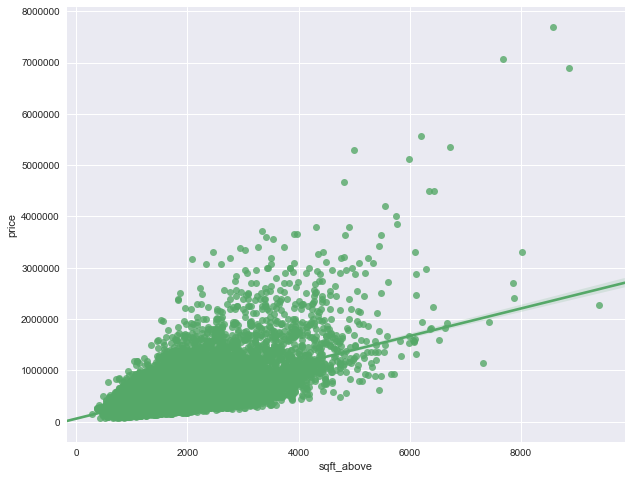

In [211]:
#Sqft_living, sqft_above & price

#Subset 'sqft_living' & 'sqft_above' for plotting
sqft_price = pd.concat([df['sqft_living'], df['price']], axis = 1)
sqftabove_price = pd.concat([df['sqft_above'], df['price']], axis = 1)

#Seaborn regression plot
sns.set(color_codes = True)
fig = plt.figure(figsize = (10,8))
_ = sns.regplot(x = 'sqft_living', y = 'price', 
                  data = sqft_price, color = 'b')

fig = plt.figure(figsize = (10,8))
_ = sns.regplot(x = 'sqft_above', y = 'price',
                  data = sqftabove_price, color = 'g')
plt.show()


#### Grade & Price
- From correlation heatmap, we can only know price has positive correlation with grades and grade has range from 1 to 13.
- With boxplot, now we can know that houses with higher grade have higher prices, with 13 the highest grade and 1 the lowest.

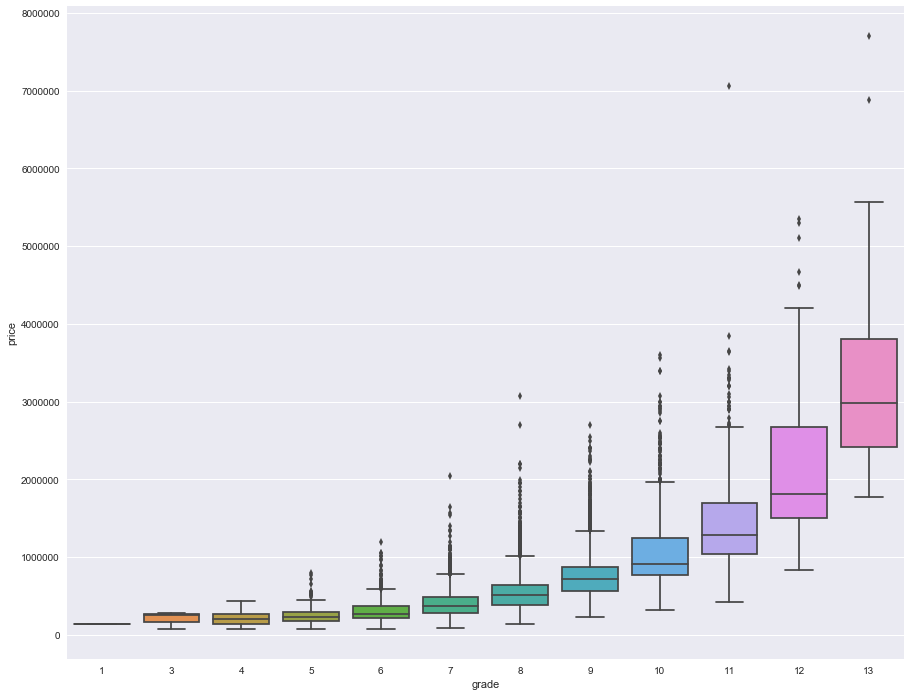

In [212]:
#Box plot grade & price
fig = plt.figure(figsize = (15, 12))
grade_price = pd.concat([df['price'], df['grade']], axis = 1)
_ = sns.boxplot(x = 'grade', y = 'price', data = grade_price)
plt.show()


#### zipcode & price
- Boxplot shows that zipcode is alos an factor that affects house prices.
- Houses located in zipcode **'98039'**, **'98004'** and **'98040'** have higher prices.

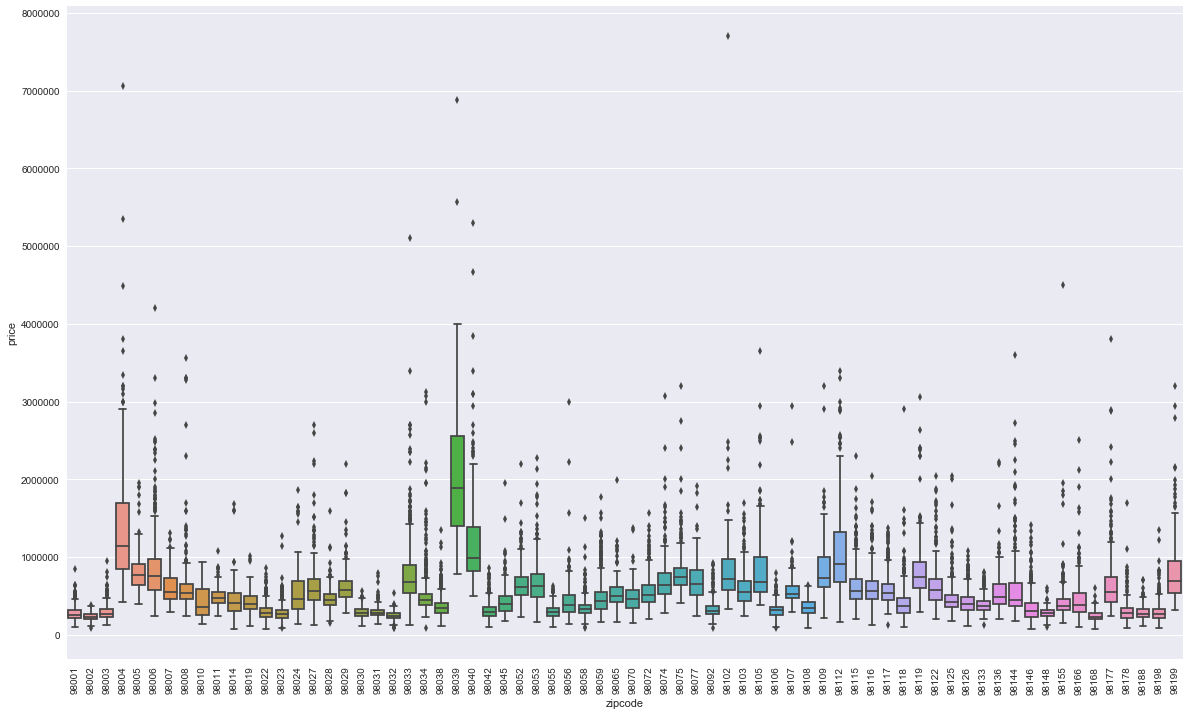

In [213]:
#Box plot zipcode & price
zipcode_price = pd.concat([df['price'], df['zipcode']], axis = 1)
f, ax = plt.subplots(figsize = (20,12))
_ = sns.boxplot(x = 'zipcode', y = 'price', data = zipcode_price)
plt.xticks(rotation = 90)
plt.show()


#### bathroom & price
- Based on boxplot, houses with more bathrooms have higher value and there is 1 house with 7.5 bathroom and another 1 house with 7.75 bathroom.
- From the histogram, most of the houses have 2.5 bathrooms and 1 bathroom.

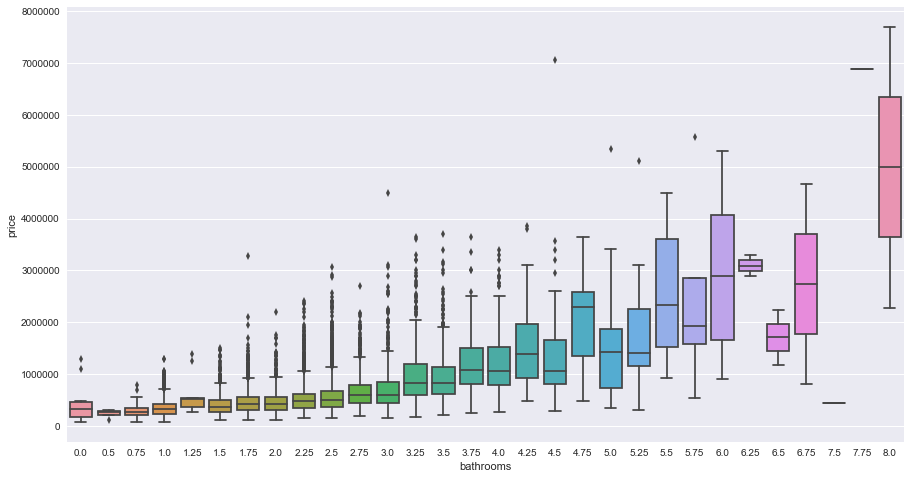

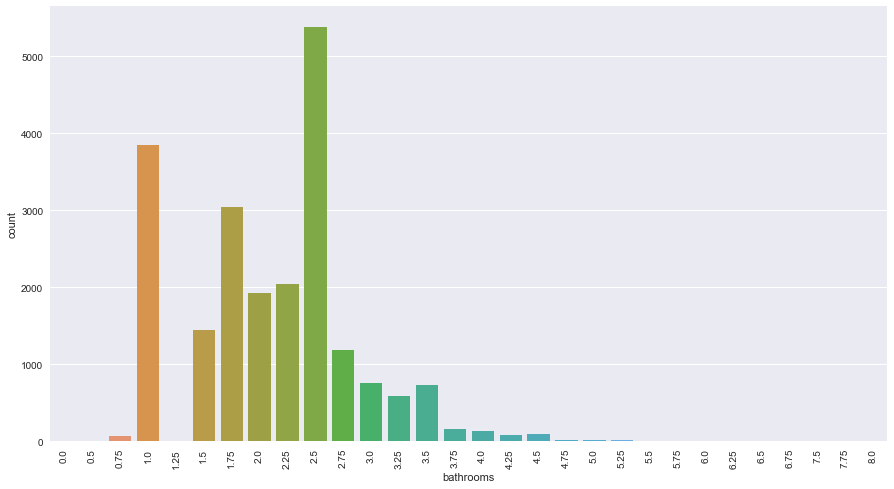

In [220]:
#Boxplot Bathroom & price
fig3 = plt.figure(figsize = (15,8))
_ = sns.boxplot(x = df.bathrooms, y = df.price)
plt.show() 

#Histogram
fig4 = plt.figure(figsize = (15,8))
bathroom_price = pd.concat([df['bathrooms'], df['price']], axis = 1)
bathroom_price.bathrooms.value_counts()
_ = sns.countplot(x = df.bathrooms)
plt.xticks(rotation = 90)
plt.show()


In [222]:
#Count the bathroom
df.bathrooms.value_counts()


2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64